In [46]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [47]:
apps = pd.read_csv('/Users/Jkovach/Downloads/google-play-store-apps/googleplaystore.csv', encoding = 'ISO-8859-1')
print(apps.head(n=5))

                                       App   Category  Rating  Reviews  Size  \
0  Life Made WI-Fi Touchscreen Photo Frame        NaN     1.9       19  3.0M   
1                 I'm Rich - Trump Edition  LIFESTYLE     3.6      275  7.3M   
2                   most expensive app (H)     FAMILY     4.3        6  1.5M   
3                            _ôÍ_ I'm rich  LIFESTYLE     3.8      718   26M   
4                                I am rich  LIFESTYLE     3.8     3547  1.8M   

   Installs  Type   Price Content Rating         Genres Last Updated  \
0    1,000+  Free    0.00       Everyone            NaN    11-Feb-18   
1   10,000+  Paid  400.00       Everyone      Lifestyle     3-May-18   
2      100+  Paid  399.99       Everyone  Entertainment    16-Jul-18   
3   10,000+  Paid  399.99       Everyone      Lifestyle    11-Mar-18   
4  100,000+  Paid  399.99       Everyone      Lifestyle    12-Jan-18   

  Current Ver   Android Ver  
0      1.0.19    4.0 and up  
1       1.0.1    4.1 and u

In [ ]:
sns.set(style='ticks') 

g = sns.FacetGrid(apps, row='Content Rating', col='Type')
g.map(plt.hist, 'Rating', color='blue', lw=0, bins=20)
plt.subplots_adjust(top=.95)
g.set_axis_labels('Rating')
g.set(xlim=(0,6))
plt.suptitle('App Ratings by Content Rating and Price')
sns.despine(trim=False)

plt.show()

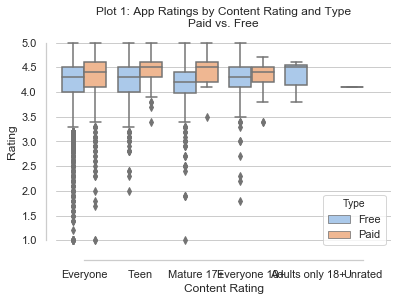

In [49]:
#Boxplot: Comparison of types by content type
sns.set(style="whitegrid")
ax = sns.boxplot(x='Content Rating',y='Rating',hue='Type',data=apps,palette='pastel')  
plt.title('Plot 1: App Ratings by Content Rating and Type\nPaid vs. Free')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Content Rating', ylabel='Rating')
plt.show()

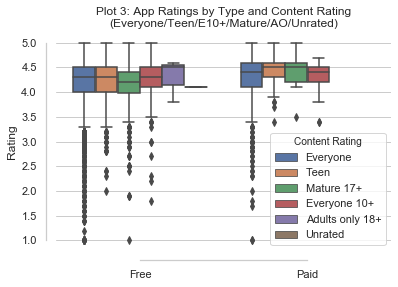

In [50]:
# Boxplot: Comparison of Content Types by Type
ax = sns.boxplot(x='Type', y='Rating', hue='Content Rating', data=apps)
plt.title('Plot 3: App Ratings by Type and Content Rating\n(Everyone/Teen/E10+/Mature/AO/Unrated)')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Rating')

plt.show()

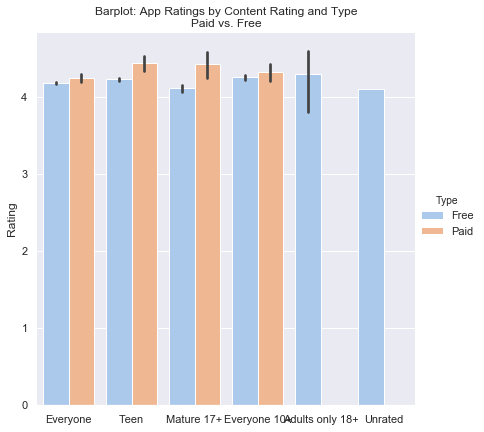

In [51]:
sns.set(style='darkgrid')

g = sns.catplot(x='Content Rating', y='Rating', hue='Type', data=apps,
               height=6, kind='bar', palette='pastel', ci=95)
g.despine(left=True)
g.set_ylabels('Rating')
g.set_xlabels('')
plt.title('Barplot: App Ratings by Content Rating and Type\nPaid vs. Free')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126dcd470>,
      dtype=object)

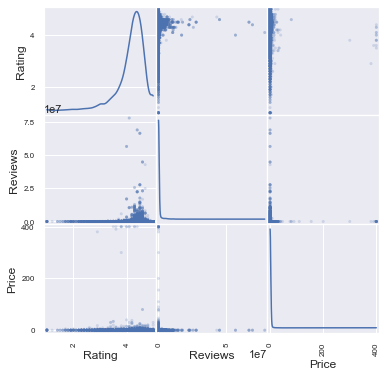

In [52]:
from pandas.plotting import scatter_matrix
scatter_matrix(apps, alpha = 0.2, figsize = (6, 6), diagonal='kde')

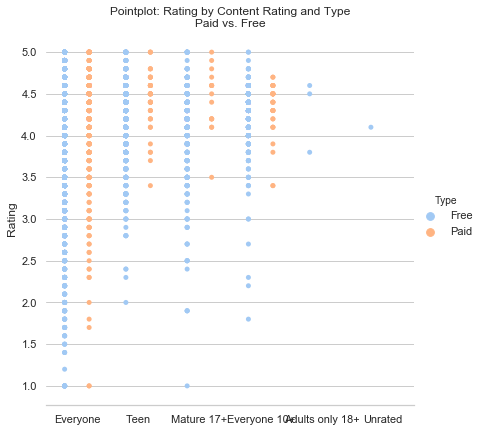

In [53]:
sns.set(style="whitegrid")

g = sns.catplot(x="Content Rating", y="Rating", hue="Type", data=apps,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,jitter=False)
g.despine(left=True)
g.set_ylabels("Rating")
g.set_xlabels("")
plt.title('Pointplot: Rating by Content Rating and Type\nPaid vs. Free')
plt.show()

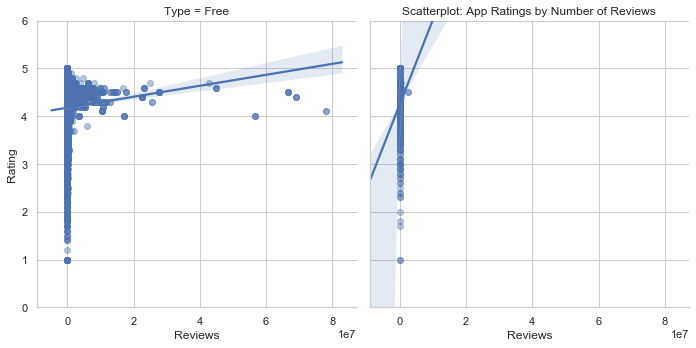

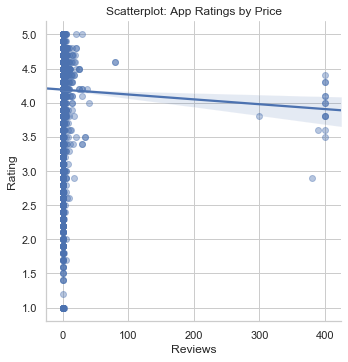

In [54]:
apps['reviews_int'] = pd.to_numeric(apps['Reviews'], errors = 'coerce')
apps['price_int'] = pd.to_numeric(apps['Price'], errors = 'coerce')


g = sns.lmplot(y='Rating',
               x='reviews_int',
               data=apps,
               col='Type',
               fit_reg=True,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Reviews")
g.set(ylim=(0,6))
plt.title('Scatterplot: App Ratings by Number of Reviews')
plt.show()

g = sns.lmplot(y='Rating',
               x='price_int',
               data=apps,
               fit_reg=True,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Reviews")
plt.title('Scatterplot: App Ratings by Price')
plt.show()

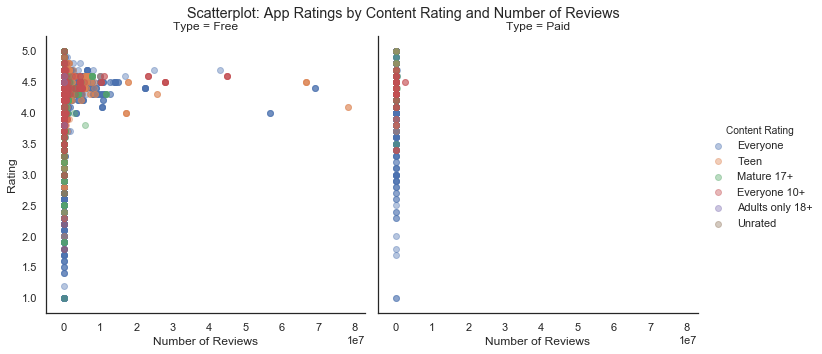

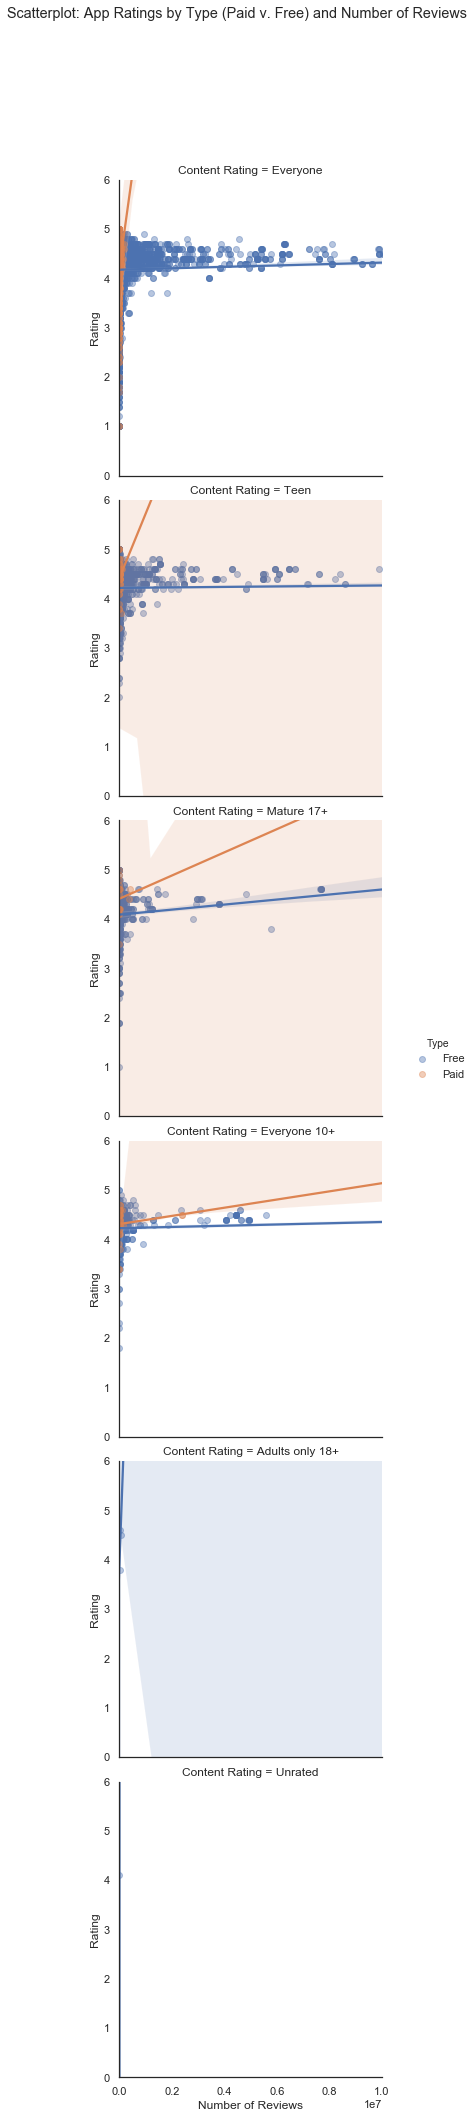

In [56]:
# Ratings by Number of Reviews
sns.set(style="white")

g = sns.lmplot(y='Rating', 
               x='reviews_int',
               hue='Content Rating',
               data=apps,
               col='Type',
               fit_reg=False,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Number of Reviews")
plt.suptitle('Scatterplot: App Ratings by Content Rating and Number of Reviews')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='Rating', 
               x='reviews_int',
               hue='Type',
               data=apps,
               row='Content Rating',
               fit_reg=True,
               ci=95,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Number of Reviews")
g.set(ylim=(0,6), xlim=(-1,10000000))
plt.suptitle('Scatterplot: App Ratings by Type (Paid v. Free) and Number of Reviews')
plt.subplots_adjust(top=0.9)
plt.show()

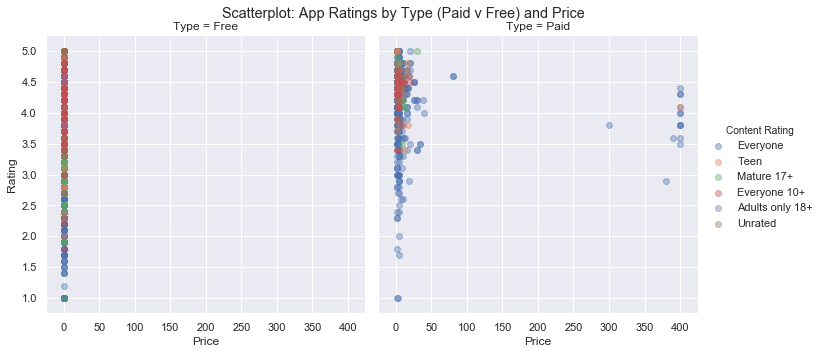

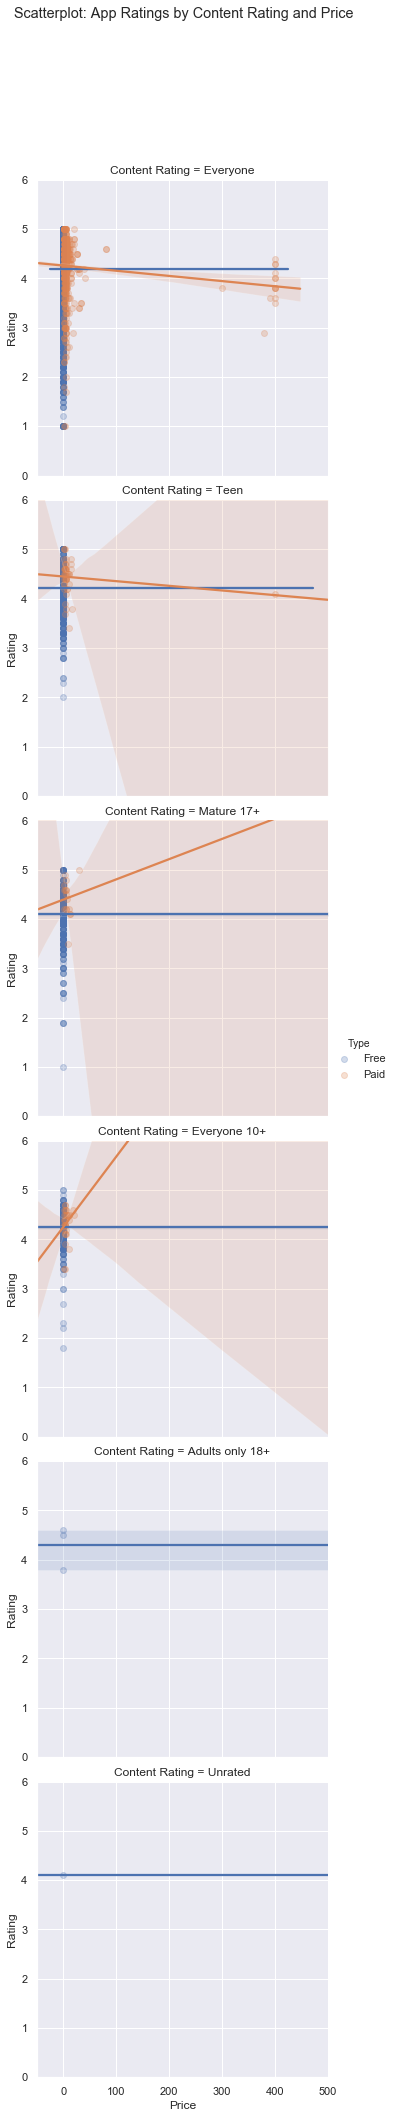

In [57]:
# Ratings by Price
sns.set(style="darkgrid")

g = sns.lmplot(y='Rating', 
               x='price_int',
               hue='Content Rating',
               data=apps,
               col='Type',
               fit_reg=False,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Price")
plt.suptitle('Scatterplot: App Ratings by Type (Paid v Free) and Price')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='Rating', 
               x='price_int',
               hue='Type',
               data=apps,
               row='Content Rating',
               fit_reg=True,
               ci=95,
               scatter_kws={'alpha':0.25})
g.set_ylabels("Rating")
g.set_xlabels("Price")
g.set(ylim=(0,6), xlim=(-50,500))
plt.suptitle('Scatterplot: App Ratings by Content Rating and Price')
plt.subplots_adjust(top=0.9)
plt.show()